In [8]:
import rospy
from geometry_msgs.msg import WrenchStamped
import numpy as np
import matplotlib.pyplot as plt
import rosbag

In [9]:
Force = []
time_secs = []
time_nsecs = []

<IPython.core.display.Javascript object>


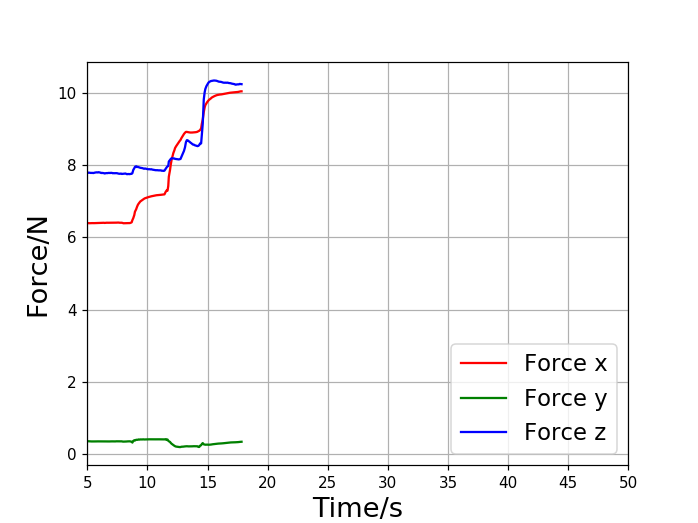

In [54]:
def main(out):
    bag = rosbag.Bag('../fv_force-controller_data/wo_controller.bag')
    for topic, msg, t in bag.read_messages(topics=['/Fv/wrench_r']):
        out.append([msg.header.stamp.secs + msg.header.stamp.nsecs * 1e-9, msg.wrench.force.x, msg.wrench.force.y, msg.wrench.force.z])
    
    bag.close()

out = []

main(out)
out = np.array(out)
out[:,0] = out[:,0] - out[0,0]



%matplotlib notebook
plt.plot(out[:, 0], out[:,1], 'r', out[:, 0], out[:,2], 'g', out[:, 0], out[:,3], 'b')

plt.xlabel('Time/s', fontsize=18)
plt.ylabel('Force/N', fontsize=18)
plt.legend(('Force x', 'Force y', 'Force z'),loc='lower right', prop={'size': 15})
plt.xlim([5,50])
plt.grid('on')

<IPython.core.display.Javascript object>


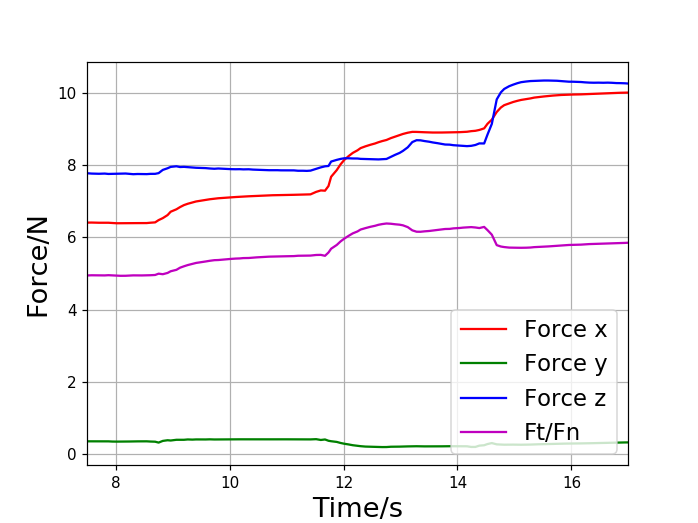

In [56]:
%matplotlib notebook
plt.plot(out[:, 0], out[:,1], 'r', out[:, 0], out[:,2], 'g', out[:, 0], out[:,3], 'b', out[:,0], 6*out[:,1]/out[:,3], 'm')

plt.xlabel('Time/s', fontsize=18)
plt.ylabel('Force/N', fontsize=18)
plt.legend(('Force x', 'Force y', 'Force z', 'Ft/Fn'),loc='lower right', prop={'size': 15})
plt.xlim([7.5,17])
plt.grid('on')
